<a href="https://colab.research.google.com/github/galhev/MNIST/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#K.set_image_dim_ordering('th')

In [0]:
seed = 7
numpy.random.seed(seed)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [51]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [55]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


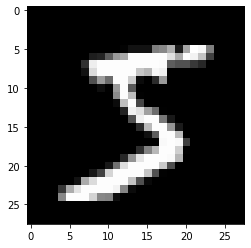

In [56]:
imshow(X_train[0].reshape([28,28]), cmap=plt.get_cmap('gray'))

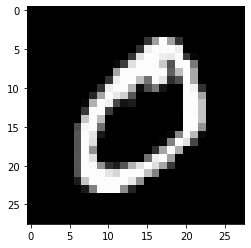

In [57]:
imshow(X_train[1].reshape([28,28]), cmap=plt.get_cmap('gray'))

In [0]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
 - 38s - loss: 0.2543 - acc: 0.9267
Epoch 2/10
 - 37s - loss: 0.0819 - acc: 0.9750
Epoch 3/10
 - 38s - loss: 0.0556 - acc: 0.9829
Epoch 4/10
 - 38s - loss: 0.0431 - acc: 0.9867
Epoch 5/10
 - 37s - loss: 0.0343 - acc: 0.9889
Epoch 6/10
 - 38s - loss: 0.0276 - acc: 0.9915
Epoch 7/10
 - 37s - loss: 0.0235 - acc: 0.9924
Epoch 8/10
 - 38s - loss: 0.0202 - acc: 0.9932
Epoch 9/10
 - 37s - loss: 0.0172 - acc: 0.9945
Epoch 10/10
 - 38s - loss: 0.0136 - acc: 0.9957


In [0]:
y_preds = model.predict(X_test)

In [61]:
y_preds

array([[4.8845177e-09, 1.2309710e-09, 4.1969529e-06, ..., 9.9998879e-01,
        7.0555835e-08, 3.2637711e-06],
       [5.1483124e-09, 2.1765862e-07, 9.9999976e-01, ..., 7.9845451e-13,
        1.3158781e-10, 7.1614887e-14],
       [1.2496912e-05, 9.9980694e-01, 1.8801810e-06, ..., 1.1427815e-04,
        6.2967638e-06, 8.5398078e-08],
       ...,
       [5.0332367e-13, 8.4106895e-11, 2.3318418e-12, ..., 1.9650690e-08,
        2.9627405e-08, 1.9554079e-08],
       [2.5158725e-10, 3.7001886e-12, 6.4121654e-14, ..., 4.3412107e-11,
        5.6902587e-05, 8.3306669e-12],
       [8.8201824e-10, 6.1834163e-11, 2.9854874e-08, ..., 9.5286082e-16,
        5.8460365e-08, 9.9349012e-13]], dtype=float32)

In [62]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03402146647683985
Test accuracy: 0.9897
